I scrapped almost all info possible from the weater website in the ExerciseXP number 5. So i will use existing dataset



In [2]:
import pandas as pd

df = pd.read_csv('../ExerciseXP/weather_data.csv')
df.head()


,time,date,temp,wind_direction,humidity,visibility,temp_feels,type,wind_speed_kph,pressure_mb,precipitation_chance,datetime
0,18:00,2024-09-26,28,North North Westerly,68,Good,36,Sunny and a gentle breeze,19,1010,0,2024-09-26 18:00:00
1,19:00,2024-09-26,28,Northerly,69,Good,36,A clear sky and a gentle breeze,18,1010,0,2024-09-26 19:00:00
2,20:00,2024-09-26,27,Northerly,71,Good,35,A clear sky and a gentle breeze,16,1011,0,2024-09-26 20:00:00
3,21:00,2024-09-26,27,Northerly,73,Good,35,A clear sky and a gentle breeze,13,1011,0,2024-09-26 21:00:00
4,22:00,2024-09-26,27,Northerly,75,Good,35,A clear sky and light winds,11,1011,0,2024-09-26 22:00:00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   time                  324 non-null    object
 1   date                  324 non-null    object
 2   temp                  324 non-null    int64 
 3   wind_direction        324 non-null    object
 4   humidity              324 non-null    int64 
 5   visibility            324 non-null    object
 6   temp_feels            324 non-null    int64 
 7   type                  324 non-null    object
 8   wind_speed_kph        324 non-null    int64 
 9   pressure_mb           324 non-null    int64 
 10  precipitation_chance  324 non-null    int64 
 11  datetime              324 non-null    object
dtypes: int64(6), object(6)
memory usage: 30.5+ KB


In [5]:
df['datetime'] = pd.to_datetime(df['datetime'])
df['date'] = pd.to_datetime(df['date'])


In [3]:
df.columns

Index(['time', 'date', 'temp', 'wind_direction', 'humidity', 'visibility',
       'temp_feels', 'type', 'wind_speed_kph', 'pressure_mb',
       'precipitation_chance', 'datetime'],
      dtype='object')

In [33]:
df.describe()


,date,temp,humidity,temp_feels,wind_speed_kph,pressure_mb,precipitation_chance,datetime
count,324,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324
mean,2024-10-03 00:00:00,25.765432,69.929012,32.083333,11.537037,1011.564815,1.444444,2024-10-03 11:29:59.999999744
min,2024-09-26 00:00:00,22.000000,52.000000,26.000000,4.000000,1008.000000,0.000000,2024-09-26 18:00:00
25%,2024-09-30 00:00:00,24.000000,62.000000,30.000000,7.750000,1010.000000,0.000000,2024-09-30 02:45:00
50%,2024-10-03 00:00:00,26.000000,69.000000,32.000000,10.000000,1012.000000,0.000000,2024-10-03 11:30:00
75%,2024-10-06 00:00:00,27.000000,78.000000,34.000000,16.000000,1013.000000,0.000000,2024-10-06 20:15:00
max,2024-10-10 00:00:00,29.000000,92.000000,37.000000,22.000000,1015.000000,57.000000,2024-10-10 05:00:00
std,NaN,1.820228,9.448470,2.400174,4.564826,2.027397,6.581708,NaN


In [34]:
df.describe(include='object')


,time,wind_direction,visibility,type
count,324,324,324,324
unique,24,17,3,14
top,18:00,North Westerly,Good,A clear sky and light winds
freq,14,55,318,117


In [35]:
df.isnull().sum()


time                    0
date                    0
temp                    0
wind_direction          0
humidity                0
visibility              0
temp_feels              0
type                    0
wind_speed_kph          0
pressure_mb             0
precipitation_chance    0
datetime                0
dtype: int64

In [71]:
from scipy import stats

def show_pearson_correlation(x, y):
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    print("Slope:", slope)
    print("Pearson correlation coefficient:", r_value)
    print("P-value:", p_value)
    print("Standard error:", std_err)
    
    return slope, intercept, r_value, p_value, std_err

def show_spearman_correlation(x, y):
    rho, p_value = stats.spearmanr(x, y)
    print("Spearman's rank correlation coefficient:", rho)
    print("P-value:", p_value)
    return rho, p_value

def show_anova_test(distributions):
    print("\nANOVA test:")
    f_value, p_value = stats.f_oneway(*distributions)
    print("F-value:", f_value)
    print("P-value:", p_value)
    return f_value, p_value

In [45]:
import plotly.express as px
import numpy as np

avg_temp = df['temp'].mean()

slope, intercept, *_ = show_pearson_correlation(df.index, df['temp'])
trend_line = intercept + slope * np.arange(len(df))

fig = px.line(df, x='datetime', y='temp', title='Temperature Trend')
fig.add_hline(y=avg_temp, line_dash="dash", line_color="red", annotation_text=f'Average: {avg_temp:.2f}', annotation_position="bottom left")
fig.add_scatter(x=df['datetime'], y=trend_line, mode='lines', name='Trend Line', line={'color': 'green', 'dash': 'dash'})

fig.update_layout(
    xaxis_title='Datetime',
    yaxis_title='Temperature',
    showlegend=True
)

fig.show()



Slope: -0.004055286532066718
Pearson correlation coefficient: -0.20869853803207203
P-value: 0.000154450304921151
Standard error: 0.001059020056491807


We can see clear downward trend in the temperature over time which is expected as we are approaching winter season.


In [47]:
avg_wind_speed = df['wind_speed_kph'].mean()

slope, intercept, *_ = show_pearson_correlation(df.index, df['wind_speed_kph'])
trend_line = intercept + slope * np.arange(len(df))

fig = px.line(df, x='datetime', y='wind_speed_kph', title='Wind Speed Trend')
fig.add_hline(y=avg_wind_speed, line_dash="dash", line_color="red", annotation_text=f'Average: {avg_wind_speed:.2f}', annotation_position="bottom left")
fig.add_scatter(x=df['datetime'], y=trend_line, mode='lines', name='Trend Line', line={'color': 'green', 'dash': 'dash'})

fig.update_layout(
    xaxis_title='Datetime',
    yaxis_title='Wind Speed'
)

fig.show()


Slope: 0.002065394758893211
Pearson correlation coefficient: 0.0423840484767972
P-value: 0.447071685382057
Standard error: 0.0027132028298578574


For wind speed there is no clear trend, but we can see that lowes speed is always at night (22 pm to 3 am) and highest during the day (2 am to 6 am)


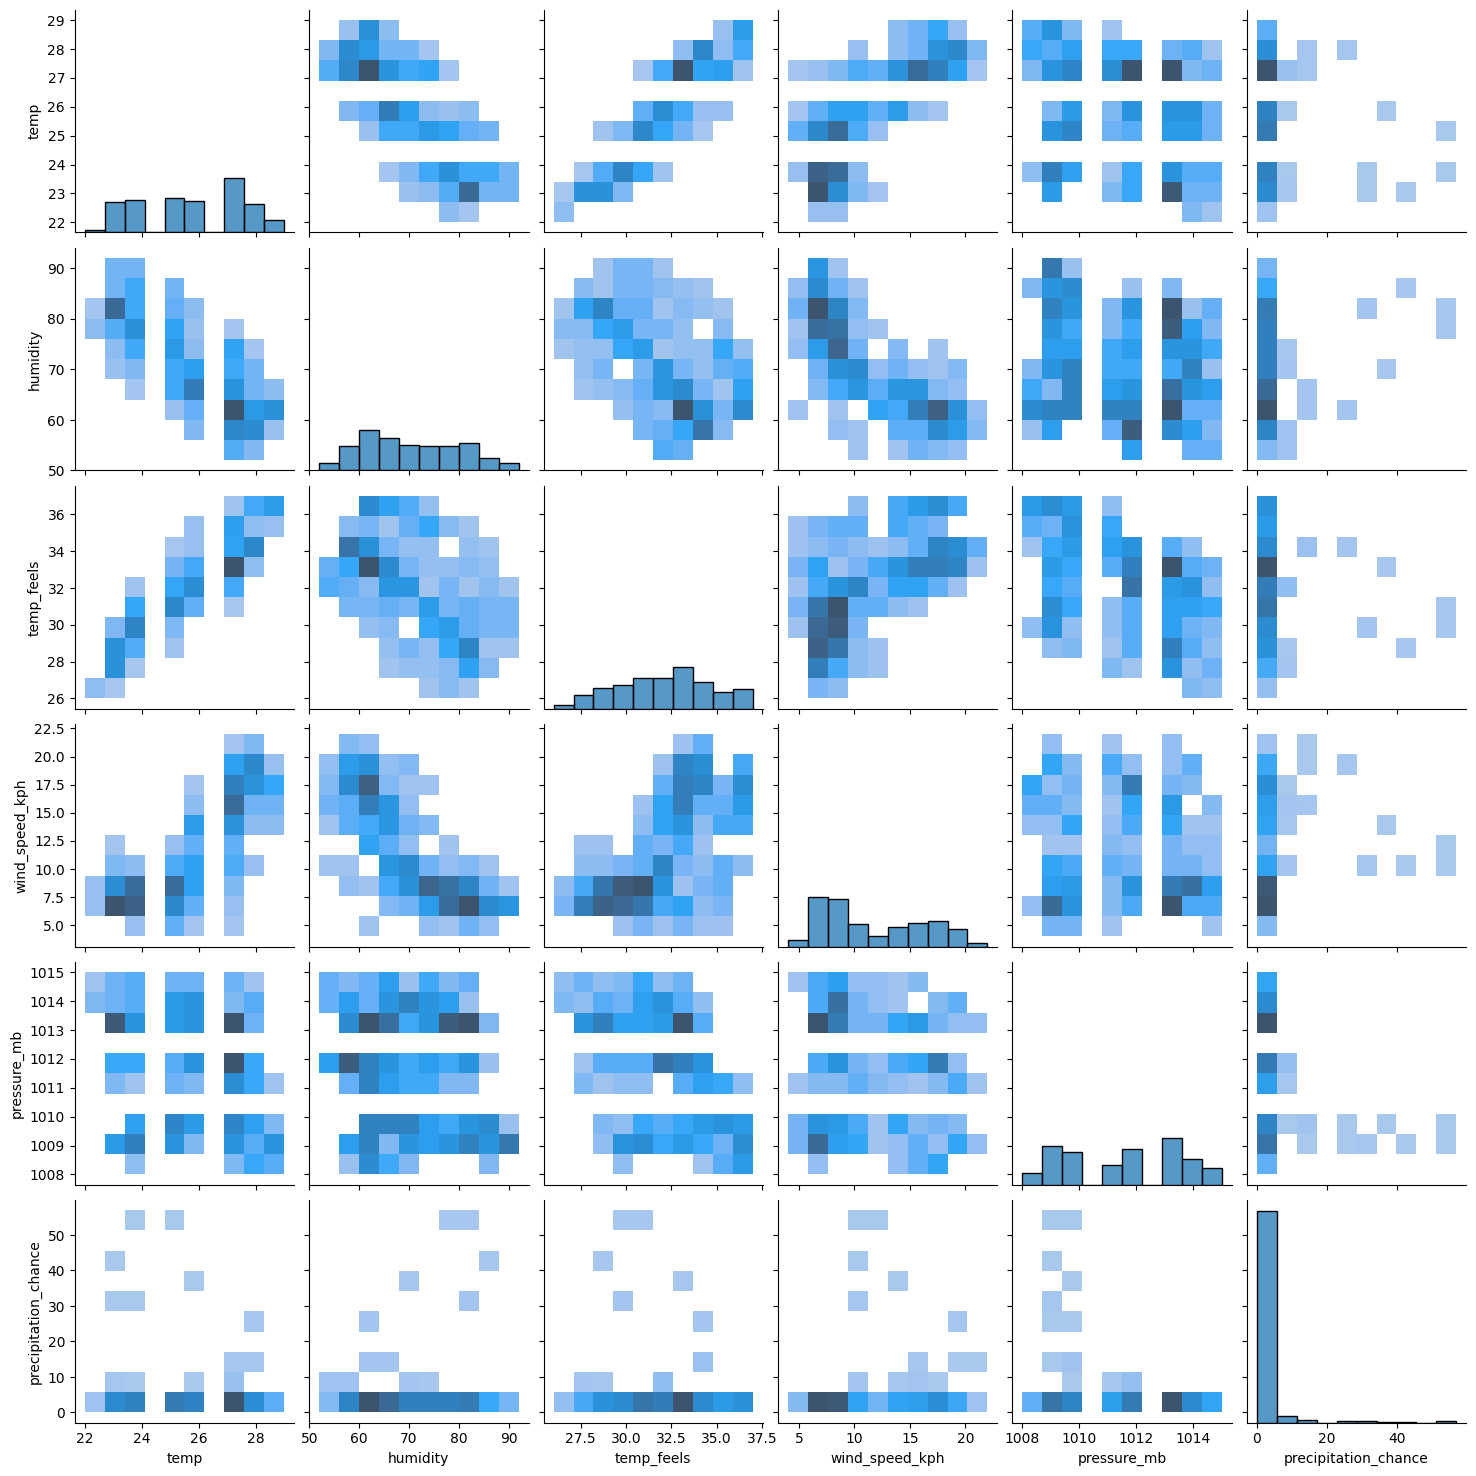

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df, kind='hist')
plt.show()


Key observations:
- Seems that there is a negative correlation between temperature and humidity
- I think that there is not enought variation in the temperature values to observe trend more clearly but looks like temperatyre and wind speed have negative correlation (especcially with percieved temperature)
- It almost always 0% chance of preciptation (so unexpectected🙂) so it's hard to get any insights from this feature








In [51]:
df.columns


Index(['time', 'date', 'temp', 'wind_direction', 'humidity', 'visibility',
       'temp_feels', 'type', 'wind_speed_kph', 'pressure_mb',
       'precipitation_chance', 'datetime'],
      dtype='object')

In [52]:
df.wind_direction.value_counts()


wind_direction
North Westerly                  55
North North Westerly            53
West North Westerly             42
Northerly                       30
Westerly                        19
East South Easterly             14
North North Easterly            14
North Easterly                  14
Easterly                        13
South South Westerly            12
Southerly                       10
East North Easterly             10
West South Westerly             10
South South Easterly            10
South Westerly                   8
South Easterly                   7
windDirection: Not available     3
Name: count, dtype: int64

There are too many categories. I guess we can separate categories like 'North North Westerly' into 'Northerly' and 'North Westerly' and duplicate rows for each one of them.


In [62]:
wind_dir = df[['temp', 'wind_direction', 'humidity', 'visibility', 'temp_feels',
               'type', 'wind_speed_kph', 'pressure_mb', 'datetime']].copy()

wind_dir = wind_dir[wind_dir['wind_direction'] != 'windDirection: Not available']
wind_dir['direction'] = wind_dir['wind_direction'].apply(lambda x: x.split(' ', 1)[0] if len(x.split(' ')) == 3 else x)
wind_dir = wind_dir.explode('direction')
wind_dir.direction = wind_dir.direction.apply(lambda x: x + 'erly' if not x.endswith('erly') else x)

wind_dir.direction.value_counts()

direction
Northerly         97
Westerly          71
North Westerly    55
Easterly          37
Southerly         32
North Easterly    14
South Westerly     8
South Easterly     7
Name: count, dtype: int64

In [68]:
wind_dir.direction = pd.Categorical(
    wind_dir.direction,
    categories=['Northerly', 'North Easterly', 'Easterly', 'South Easterly', 'Southerly', 'South Westerly', 'Westerly', 'North Westerly'],
    ordered=True
)


In [74]:
import plotly.express as px

fig = px.box(wind_dir.sort_values('direction'), x='direction', y='temp', title='Wind Direction vs Temperature')
fig.update_layout(xaxis_title='Wind Direction', yaxis_title='Temperature')
fig.show()


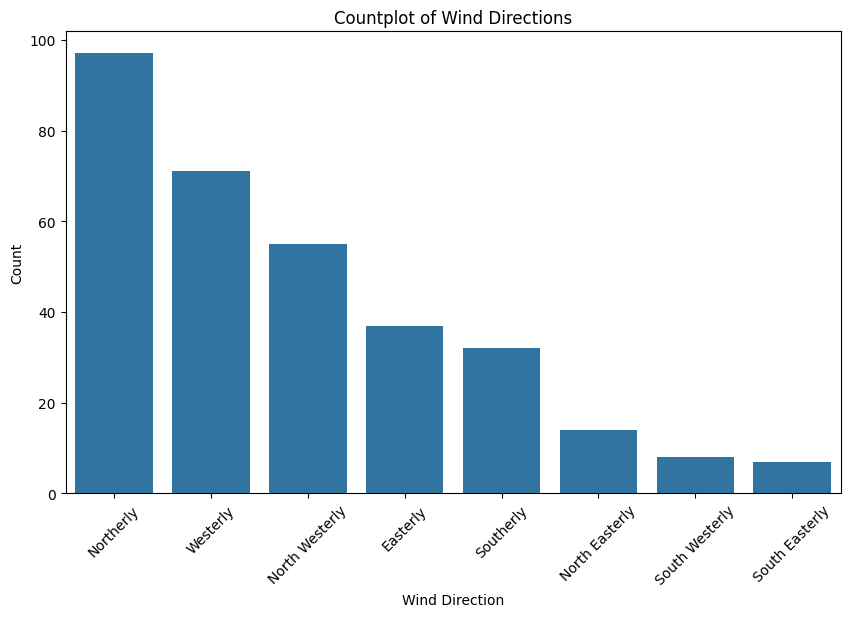

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.countplot(data=wind_dir, x='direction', order=wind_dir['direction'].value_counts().index)
plt.title('Countplot of Wind Directions')
plt.xlabel('Wind Direction')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [72]:
show_anova_test([wind_dir[wind_dir['direction'] == direction]['temp'] for direction in wind_dir['direction'].unique()])


ANOVA test:
F-value: 77.29838971050233
P-value: 1.8098782138360403e-64


(np.float64(77.29838971050233), np.float64(1.8098782138360403e-64))

We observe that on average the closer direction to West the higher temperature is and the closer to East the lower.
And ANOVA test confirms that there is a significant difference.
